In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files/'))

from CustomAstromodels import *
import numpy as np
import matplotlib.pyplot as plt

11:59:28 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=27857;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=474591;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=38926;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=182520;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=223044;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=224854;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [39]:
fit_vals_beuermann = [
5.455278890846922715e-05,
-1.729371992325146934e+00,
-2.206414502055106475e+00,
3.611972999312689225e+00,
4.645860259441865878e+02,
3.126825741408119370e+02,
]

fit_vals_band = [
    8.533732702689731525e-04,
    -1.946259908534711425e+00,
    -2.246190241592299408e+00,
]

In [43]:
x = np.geomspace(20, 1000, 200)
band = C_Band()
y = band.evaluate(x, fit_vals_band[0], fit_vals_beuermann[1], 500, fit_vals_band[2], 100)
y_b = band.evaluate(x, fit_vals_band[0], fit_vals_band[1], 500, fit_vals_band[2], 100)



beuermann = Beuermann()
y2 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 100, 100)
y3 = beuermann.evaluate(x, 7e-4, -1.5, -1.2, 1.2, 100, 200)

print(len(fit_vals_beuermann))

y_fit = beuermann.evaluate(x, *fit_vals_beuermann)
fit_vals_beuermann[3] = 10
y_fit_2 = beuermann.evaluate(x, *fit_vals_beuermann)

0.0007 -1.5 -3 1 100 100
0.0007 -1.5 -1.2 1.2 100 200
6
5.455278890846923e-05 -1.729371992325147 -2.2064145020551065 10 464.5860259441866 312.68257414081194
5.455278890846923e-05 -1.729371992325147 -2.2064145020551065 10 464.5860259441866 312.68257414081194


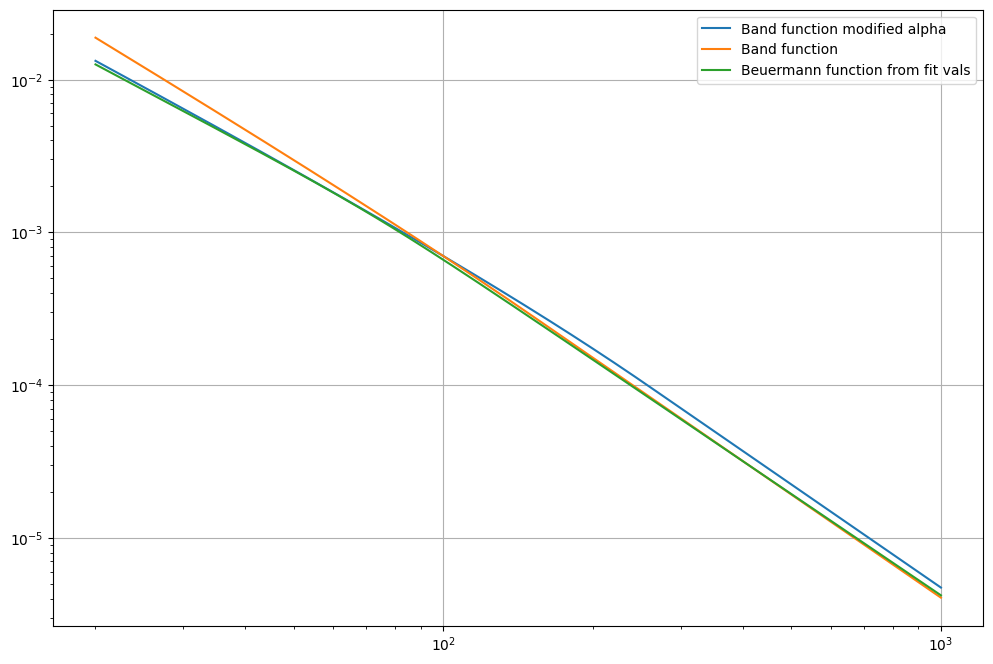

In [46]:
# comparison of the spectrum functions with real fit values

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y, label='Band function modified alpha')
ax.plot(x, y_b, label='Band function')
# ax.plot(x, y2, label='Beuermann function n = 1')
ax.plot(x, y_fit, label='Beuermann function from fit vals')
# ax.plot(x, y_fit_2, label='Beuermann function')
ax.legend()


0.0007 -1.5 -3 1 300 100
0.0007 -1.5 -3 1 100 300
0.0002 -1.5 -3 1 200 600
6


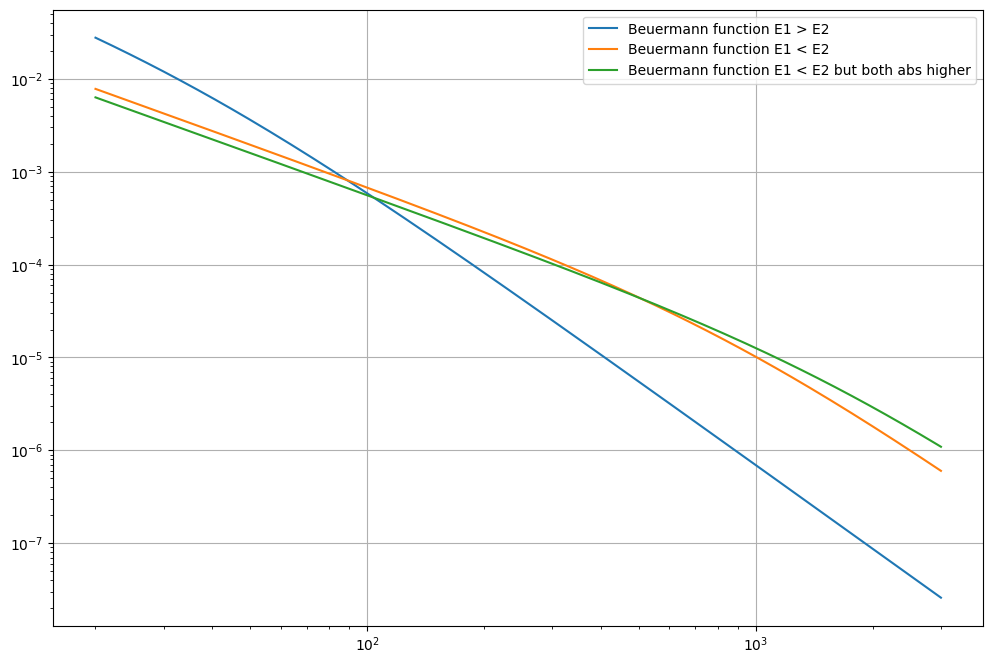

In [51]:

x = np.geomspace(20, 3000, 200)

beuermann = Beuermann()
y2 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 300, 100)
y3 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 100, 300)
y4 = beuermann.evaluate(x, 2e-4, -1.5, -3, 1, 200, 600)


print(len(fit_vals_beuermann))

# y_fit = beuermann.evaluate(x, *fit_vals_beuermann)
# fit_vals_beuermann[3] = 10
# y_fit_2 = beuermann.evaluate(x, *fit_vals_beuermann)

# comparison of the spectrum functions with real fit values

fig, ax = plt.subplots(figsize=(12, 8))

ax.grid()

ax.set_xscale('log')
ax.set_yscale('log')
# ax.plot(x, y, label='Band function modified alpha')
# ax.plot(x, y_b, label='Band function')
# ax.plot(x, y2, label='Beuermann function n = 1')
ax.plot(x, y2, label='Beuermann function E1 > E2')
ax.plot(x, y3, label='Beuermann function E1 < E2')
ax.plot(x, y4, label='Beuermann function E1 < E2 but both abs higher')
# ax.plot(x, y_fit_2, label='Beuermann function')

ax.legend()